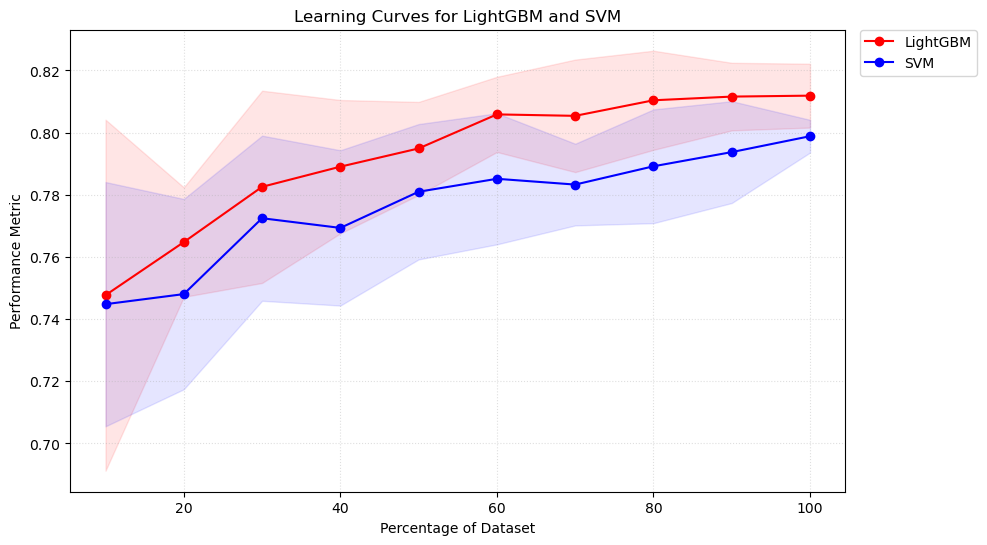

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Load CSV files
lgbm_df = pd.read_csv('./data/lgbm_accuracies.csv')
svm_df = pd.read_csv('./data/svm_accuracies.csv')

# Calculate mean and standard deviation for each row in both dataframes
lgbm_df['mean'] = lgbm_df.mean(axis=1)
lgbm_df['std'] = lgbm_df.std(axis=1)

svm_df['mean'] = svm_df.mean(axis=1)
svm_df['std'] = svm_df.std(axis=1)

# Convert the index to percentages
percentage_values = np.linspace(10, 100, len(lgbm_df.index))
lgbm_df.index = percentage_values
svm_df.index = percentage_values

# Plot the learning curves
plt.figure(figsize=(10, 6))

# LightGBM curve
plt.fill_between(lgbm_df.index, lgbm_df['mean'] - lgbm_df['std'], lgbm_df['mean'] + lgbm_df['std'], alpha=0.1, color="r")
plt.plot(lgbm_df.index, lgbm_df['mean'], 'o-', color="r", label="LightGBM")

# SVM curve
plt.fill_between(svm_df.index, svm_df['mean'] - svm_df['std'], svm_df['mean'] + svm_df['std'], alpha=0.1, color="b")
plt.plot(svm_df.index, svm_df['mean'], 'o-', color="b", label="SVM")

plt.xlabel("Percentage of Dataset")
plt.ylabel("Performance Metric")
plt.legend(loc="upper right", bbox_to_anchor=(1.17, 1), borderaxespad=0.)
plt.title("Learning Curves for LightGBM and SVM")

# Remove x-axis padding and add grid with dots and lower opacity
plt.grid(True, linestyle='dotted', alpha=0.4)

plt.show()


              precision    recall  f1-score   support

           0       0.91      0.71      0.80       360
           1       0.73      0.92      0.81       300

    accuracy                           0.80       660
   macro avg       0.82      0.81      0.80       660
weighted avg       0.83      0.80      0.80       660

              precision    recall  f1-score   support

           0       0.89      0.73      0.80       360
           1       0.73      0.89      0.80       300

    accuracy                           0.80       660
   macro avg       0.81      0.81      0.80       660
weighted avg       0.81      0.80      0.80       660



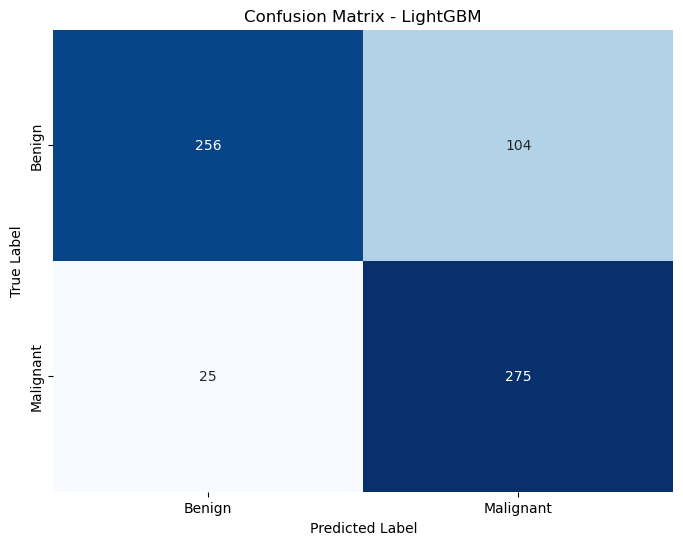

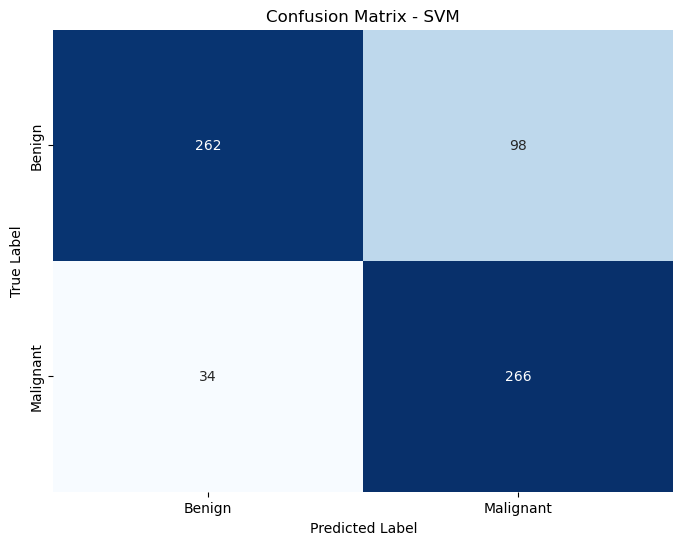

In [23]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your CSV files have columns 'label' for true labels
# and 'label' for predicted labels

# Load the CSV files with predicted labels
lgbm_pred = pd.read_csv('./data/lgbm_ypred.csv')
svm_pred = pd.read_csv('./data/svm_ypred.csv')
df_true = pd.read_csv('./data/features/test_features.csv')
y_true = df_true['label']

# Extract true and predicted labels
lgbm_y_pred = lgbm_pred['label']
svm_y_pred = svm_pred['label']

# Create confusion matrix for LightGBM
print(classification_report(y_true, lgbm_y_pred))
print(classification_report(y_true, svm_y_pred))

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_true, lgbm_y_pred, and svm_y_pred are already defined

# Map class labels to corresponding names
class_names = ['Benign', 'Malignant']

# Compute confusion matrices
lgbm_cm = confusion_matrix(y_true, lgbm_y_pred)
svm_cm = confusion_matrix(y_true, svm_y_pred)

# Plot confusion matrix for LightGBM
plt.figure(figsize=(8, 6))
sns.heatmap(lgbm_cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - LightGBM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()




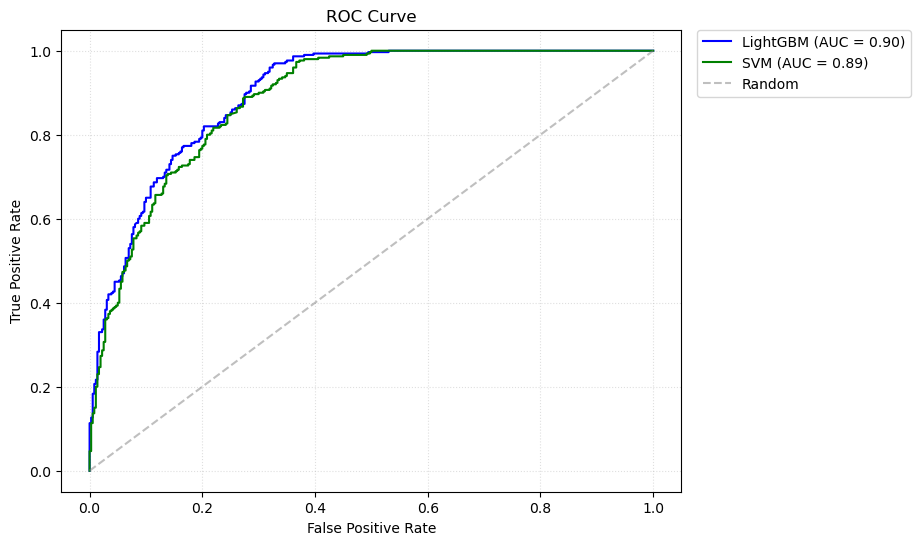

In [7]:
import pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the CSV files with predicted probabilities
lgbm_pred = pd.read_csv('./data/lgbm_y_pred_proba.csv')
svm_pred = pd.read_csv('./data/svm_y_pred_proba.csv')

# Assuming your CSV files look like this:
# | proba_0 | proba_1 |
# |---------|---------|
# | 0.2     | 0.8     |
# | ...     | ...     |

# Extract true labels and predicted probabilities for class 1
df_true = pd.read_csv('./data/features/test_features.csv')
y_true = df_true['label']

lgbm_proba_1 = lgbm_pred['1']
svm_proba_1 = svm_pred['1']

# Calculate ROC-AUC scores
lgbm_auc = roc_auc_score(y_true, lgbm_proba_1)
svm_auc = roc_auc_score(y_true, svm_proba_1)

# Calculate ROC curves
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_true, lgbm_proba_1)
fpr_svm, tpr_svm, _ = roc_curve(y_true, svm_proba_1)

# Plot ROC curves
plt.figure(figsize=(8, 6))

plt.plot(fpr_lgbm, tpr_lgbm, color='blue', label=f'LightGBM (AUC = {lgbm_auc:.2f})')
plt.plot(fpr_svm, tpr_svm, color='green', label=f'SVM (AUC = {svm_auc:.2f})')

# Plot the ROC curve for a random classifier
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random', alpha=0.5)

# Add a dotted grid with opacity
plt.grid(True, linestyle='dotted', alpha=0.4)

# Place legend outside the plot in the top right
plt.legend(loc="upper right", bbox_to_anchor=(1.37, 1), borderaxespad=0.)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
